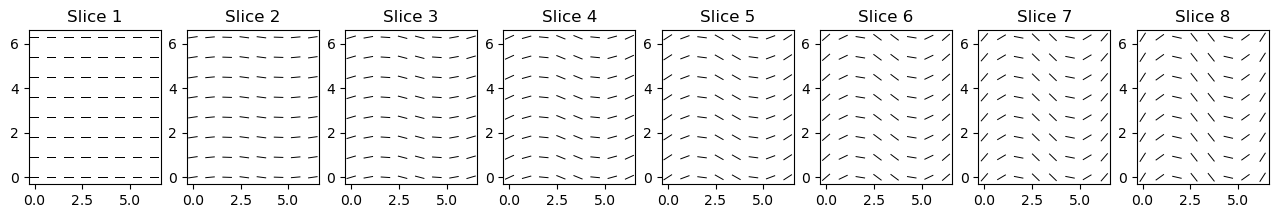

In [1]:
import numpy as np
import matplotlib.pyplot as plt

box_length = 8
amplitude = np.linspace(0,1,box_length)
frequency = 1
x_const = 1.0

x = np.linspace(0, 2*np.pi, box_length)
y = np.linspace(0, 2*np.pi, box_length)
z = np.linspace(0, 2*np.pi, box_length)
X, Y, Z = np.meshgrid(x, y, z, indexing="xy")

Q_slices = np.zeros(X.shape)
U_slices = np.zeros(X.shape)

# field geoemtry - wavy
for i in range(len(Z)):
    angle = amplitude[i] * np.cos(frequency * X[:,:,i])
    # Bx = np.cos(angle)      
    # By = np.sin(angle)
    # Local Stokes parameters
    p0 = 1
    Q_slices[:,:,i] = p0 * np.cos(2 * angle)
    U_slices[:,:,i] = p0 * np.sin(2 * angle)


phi = np.arctan2(U_slices, Q_slices) / 2

fig, ax = plt.subplots(1, 8, figsize=(16, 2))
for i in range(box_length):
    ax[i].quiver(
        X[:,:,i],
        Y[:,:,i],
        np.cos(phi[:,:,i]),
        np.sin(phi[:,:,i]),
        pivot='middle',
        scale=2,
        scale_units='xy',
        headaxislength=0,
        headlength=0,
        headwidth=1
    )
    ax[i].set_title(f"Slice {i+1}")





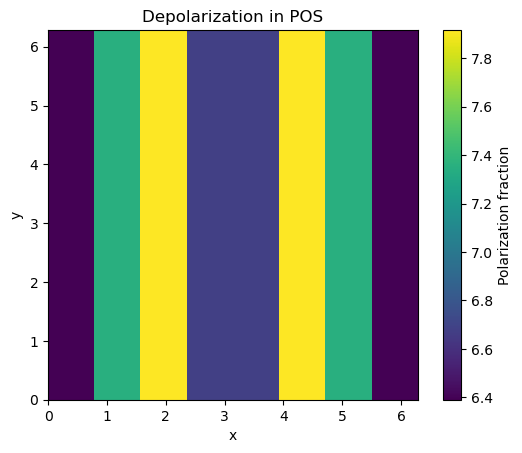

In [2]:
# # Integrate along LOS
# I_obs = np.sum(I, axis=2)
Q_obs = np.sum(Q_slices, axis=2)
U_obs = np.sum(U_slices, axis=2)

# # Polarization fraction
P_obs = np.sqrt(Q_obs**2 + U_obs**2)
# pfrac = P_obs / I_obs

# print("Mean polarization fraction:", np.mean(pfrac))

# Plot
plt.figure()
plt.imshow(
    P_obs,
    origin='lower',
    extent=[x.min(), x.max(), y.min(), y.max()]
)
plt.colorbar(label="Polarization fraction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Depolarization in POS")
plt.show()